In [1]:
# !pip install prophet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_excel("/content/Airlines+Data.xlsx")

In [4]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
# Convert the 'Month' column to a datetime type
data['Month'] = pd.to_datetime(data['Month'])

In [6]:
# Set the 'Month' column as the index
data = data.set_index('Month')

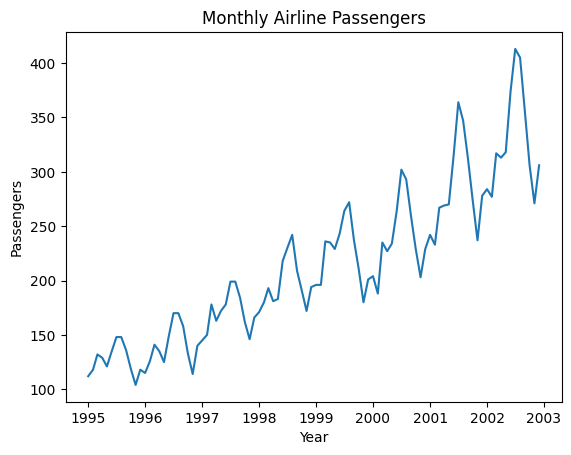

In [7]:
# Visualize the data
plt.plot(data)
plt.title('Monthly Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

In [8]:
# Split the data into training and testing sets
train = data[:"1999"]
test = data["2000":]

In [9]:
train.shape

(60, 1)

In [10]:
test.shape

(36, 1)

Forecasting models using different libraries

#Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpel1xgypw/a_6jfgqz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpel1xgypw/kdaj4ksg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67919', 'data', 'file=/tmp/tmpel1xgypw/a_6jfgqz.json', 'init=/tmp/tmpel1xgypw/kdaj4ksg.json', 'output', 'file=/tmp/tmpel1xgypw/prophet_model7j1hwysm/prophet_model-20230512193734.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:37:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:37:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


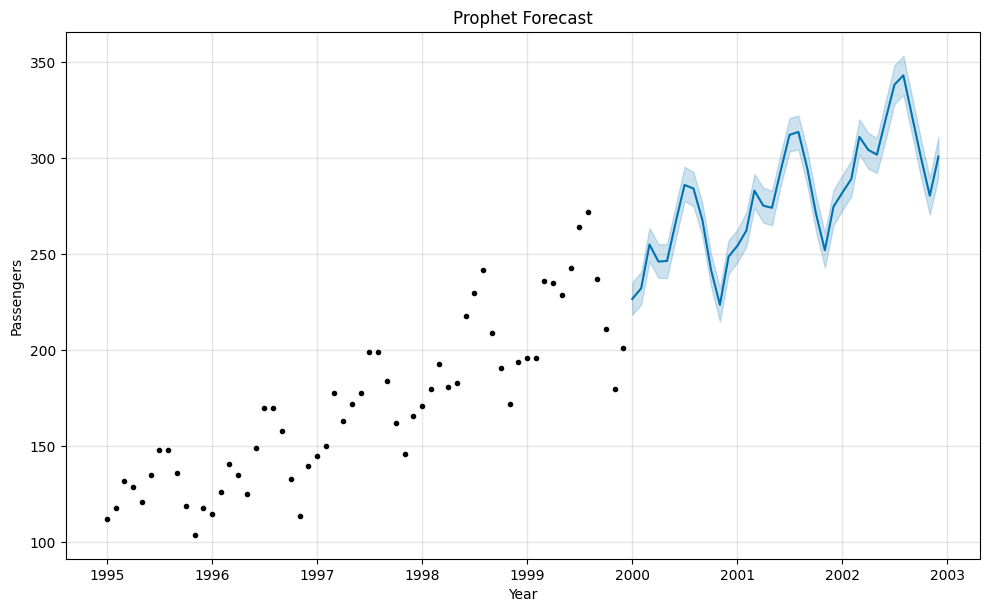

In [11]:

from prophet import Prophet

# Fit the model
model = Prophet()
model.fit(train.reset_index().rename(columns={'Month':'ds', 'Passengers':'y'}))

# Make predictions on the test set
forecast = model.predict(test.reset_index().rename(columns={'Month':'ds'}))

# Visualize the forecast
model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

#Arima

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


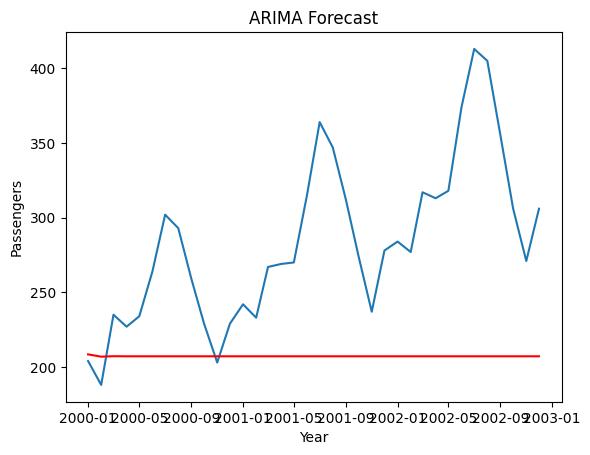

In [12]:
import statsmodels.api
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start='2000-01-01', end='2002-12-01', dynamic=False)

# Visualize the forecast
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

#Exponential Smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


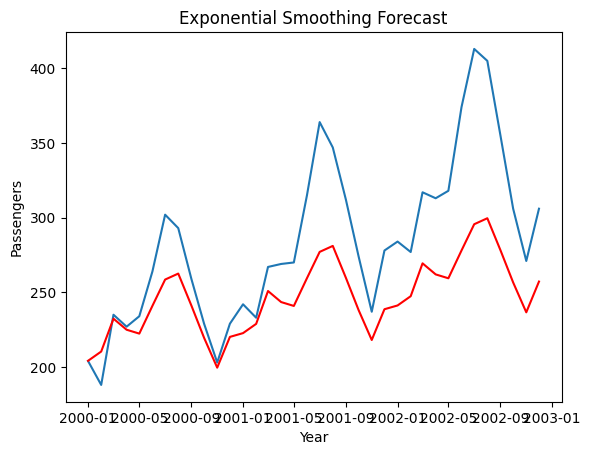

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start='2000-01-01', end='2002-12-01')

# Visualize the forecast
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

#LSTM

Epoch 1/100


<ipython-input-14-1c17dc33c44c>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_sequence, epochs=100)


48/48 [==============================] - 5s 14ms/step - loss: 8683.2822
Epoch 2/100
48/48 [==============================] - 1s 17ms/step - loss: 650.9941
Epoch 3/100
48/48 [==============================] - 1s 19ms/step - loss: 577.3445
Epoch 4/100
48/48 [==============================] - 1s 16ms/step - loss: 374.7509
Epoch 5/100
48/48 [==============================] - 1s 11ms/step - loss: 574.1368
Epoch 6/100
48/48 [==============================] - 0s 9ms/step - loss: 643.5756
Epoch 7/100
48/48 [==============================] - 1s 12ms/step - loss: 447.3071
Epoch 8/100
48/48 [==============================] - 1s 13ms/step - loss: 856.8264
Epoch 9/100
48/48 [==============================] - 1s 15ms/step - loss: 2090.8826
Epoch 10/100
48/48 [==============================] - 1s 10ms/step - loss: 444.5945
Epoch 11/100
48/48 [==============================] - 1s 12ms/step - loss: 363.3464
Epoch 12/100
48/48 [==============================] - 1s 16ms/step - loss: 223.1904
Epoch 13/100

<ipython-input-14-1c17dc33c44c>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_sequence)


Text(0.5, 0, 'Year')

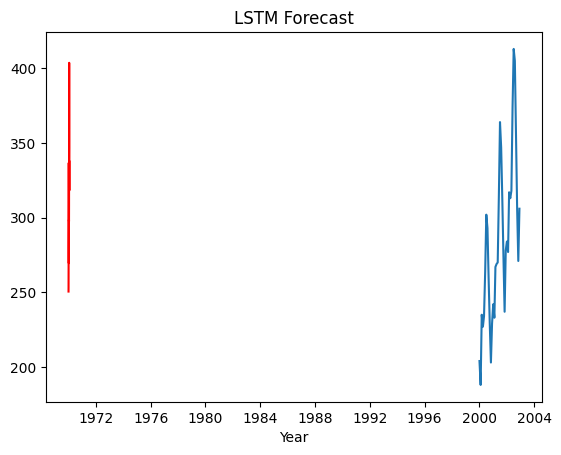

In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.preprocessing.sequence import TimeseriesGenerator

# Create the input sequences
train_sequence = TimeseriesGenerator(train.values, train.values, length=12, batch_size=1)
test_sequence = TimeseriesGenerator(test.values, test.values, length=12, batch_size=1)

# Build the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(12, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# Fit the model
model.fit_generator(train_sequence, epochs=100)

# Make predictions on the test set
predictions = model.predict_generator(test_sequence)

# Visualize the forecast
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('LSTM Forecast')
plt.xlabel('Year')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


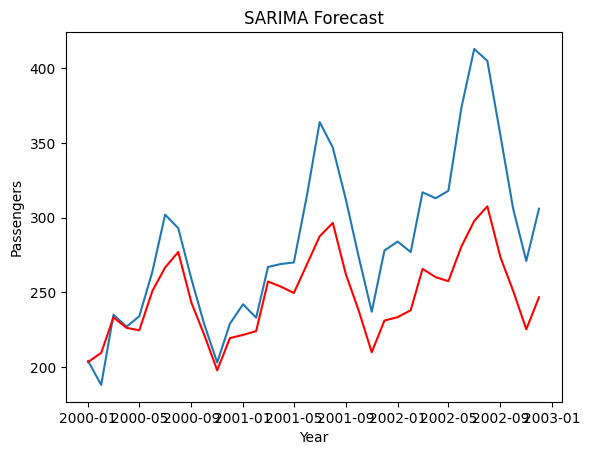

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Fit the SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start='2000-01-01', end='2002-12-01', dynamic=False)

# Visualize the forecast
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

From the results it is clear the Prophet library among all the libraries performing much better than other models,other than that Arima and Sarima models also giving somewhat similar trend than actual data. 